<a href="https://colab.research.google.com/github/Eisawi7/date-mining-1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import data set

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_excel('ClevlandDataSet.xlsx')
df.head()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,Thalach,Exang,Oldpeak,Slop,CA,thal,Class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       297 non-null    int64  
 1   Sex       297 non-null    int64  
 2   CP        297 non-null    int64  
 3   Trestbps  297 non-null    int64  
 4   Chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   Thalach   297 non-null    int64  
 8   Exang     297 non-null    int64  
 9   Oldpeak   297 non-null    float64
 10  Slop      297 non-null    int64  
 11  CA        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  Class     297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [16]:
print("Column names",df.columns.tolist())

Column names ['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'fbs', 'restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slop', 'CA', 'thal', 'Class']


In [21]:
col = input("Enter column name:")
print(df.columns.tolist())

Enter column name:sex
['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'fbs', 'restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slop', 'CA', 'thal', 'Class']


In [28]:
col = input("Enter column name:")
df[col].value_counts()

Enter column name:Class


,count
Class,
0,160
1,54
2,35
3,35
4,13


dtype:int64


In [31]:
df[col].isnull().sum()

np.int64(0)

In [32]:
df[col].isna().sum()

np.int64(0)

In [33]:
df[col].unique()

array([0, 2, 1, 3, 4])

In [35]:
len(df[col])

297

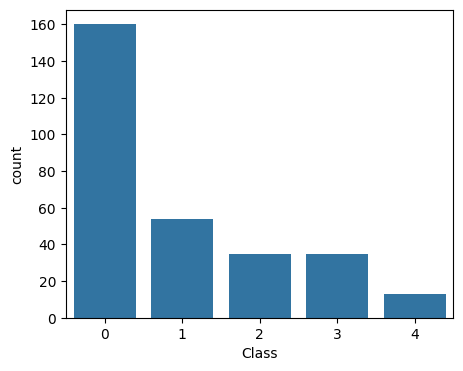

In [38]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x=col)
plt.show()

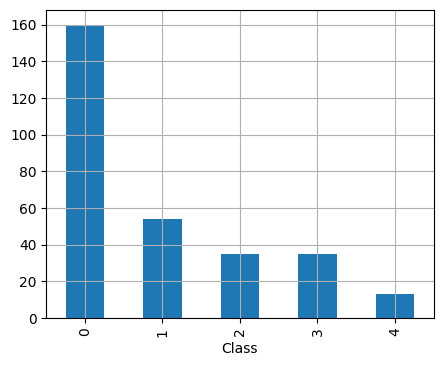

In [41]:
plt.figure(figsize=(5,4))
df[col].value_counts().plot(kind='bar')
plt.grid(True)
plt.show()

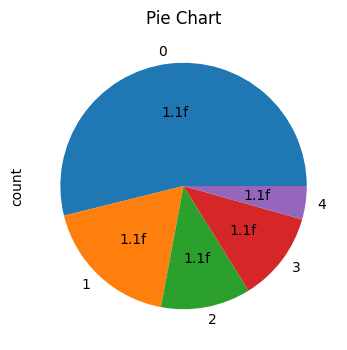

In [43]:
plt.figure(figsize=(5,4))
df[col].value_counts().plot(kind='pie',autopct="1.1f")
plt.title("Pie Chart")
plt.grid(True)
plt.show()